In [1]:
import cv2
import imghdr
import os
import tensorflow as tf

/var/folders/sq/mhcd5x813zx_mx2p1c1glwc80000gn/T/ipykernel_35479/830691477.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir='data'

In [3]:
image_ext=['jpg', 'jpeg', 'png']

In [4]:
filtered_contents = [item for item in os.listdir(data_dir) if item != '.DS_Store']

In [5]:
for image_class in filtered_contents:
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except:
            print("Issue with image: {}", format(image_path))

Issue with image: {} data/happy/images26.jpg
Issue with image: {} data/happy/images32.jpg
Issue with image: {} data/happy/e162ccda8ce0f197f8863f327add9233.jpg
Issue with image: {} data/happy/05-12-21-happy-people.jpg
Issue with image: {} data/happy/image22.jpeg
Issue with image: {} data/happy/GettyImages-871518740-1024x707.jpg
Issue with image: {} data/happy/7-principles-of-successful-and-happy-people.png
Issue with image: {} data/happy/how-happy-are-healthy-people.jpg
Issue with image: {} data/happy/physed-happiness-facebookJumbo.jpg
Issue with image: {} data/happy/170404-happy-workers-feature.jpg
Issue with image: {} data/happy/images33.jpg
Issue with image: {} data/happy/images27.jpg
Issue with image: {} data/happy/image18.jpeg
Issue with image: {} data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
Issue with image: {} data/happy/images31.jpg
Issue with image: {} data/happy/images25.jpg
Issue with image: {} data/happy/Happy-people-raise-happy-kids-raise-yourself-firs

Issue with image: {} data/happy/happy-girl-in-leaves.jpg
Issue with image: {} data/sad/images26.jpg
Issue with image: {} data/sad/maxresdefault4.jpg
Issue with image: {} data/sad/images32.jpg
Issue with image: {} data/sad/sad-person-concept-vector-26538685.jpg
Issue with image: {} data/sad/image22.jpeg
Issue with image: {} data/sad/sad-people-icon-2CCHXB2.jpg
Issue with image: {} data/sad/vh6to.jpg
Issue with image: {} data/sad/dreamstime_s_101440985.jpg
Issue with image: {} data/sad/images33.jpg
Issue with image: {} data/sad/images27.jpg
Issue with image: {} data/sad/image18.jpeg
Issue with image: {} data/sad/images31.jpg
Issue with image: {} data/sad/images25.jpg
Issue with image: {} data/sad/images19.jpg
Issue with image: {} data/sad/iStock_000001932580XSmall.jpg
Issue with image: {} data/sad/images18.jpg
Issue with image: {} data/sad/images24.jpg
Issue with image: {} data/sad/images30.jpg
Issue with image: {} data/sad/image14.jpeg
Issue with image: {} data/sad/image15.jpeg
Issue wi

-OpenCV reads in the BGR format
-Normal Images in RGB format

## Load Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)    ##Data is shuffled by default

Found 305 files belonging to 2 classes.


In [8]:
data_iterator= data.as_numpy_iterator()

In [9]:
batch= data_iterator.next()    #retrieves the next batch of data 

In [10]:
len(batch)   #image representations and labels

2

In [11]:
 
batch[0].shape   #batch size, height, width, channels

(32, 256, 256, 3)

In [12]:
batch[1].shape

(32,)

In [13]:
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int32)

In [14]:
batch_index = 0
while True:
    try:
        batch = data_iterator.next()
        batch_index += 1
    except StopIteration:
        break

last_batch_index = batch_index - 1
print("Last batch index:", last_batch_index)

Last batch index: 8


2024-12-25 01:22:55.417254: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


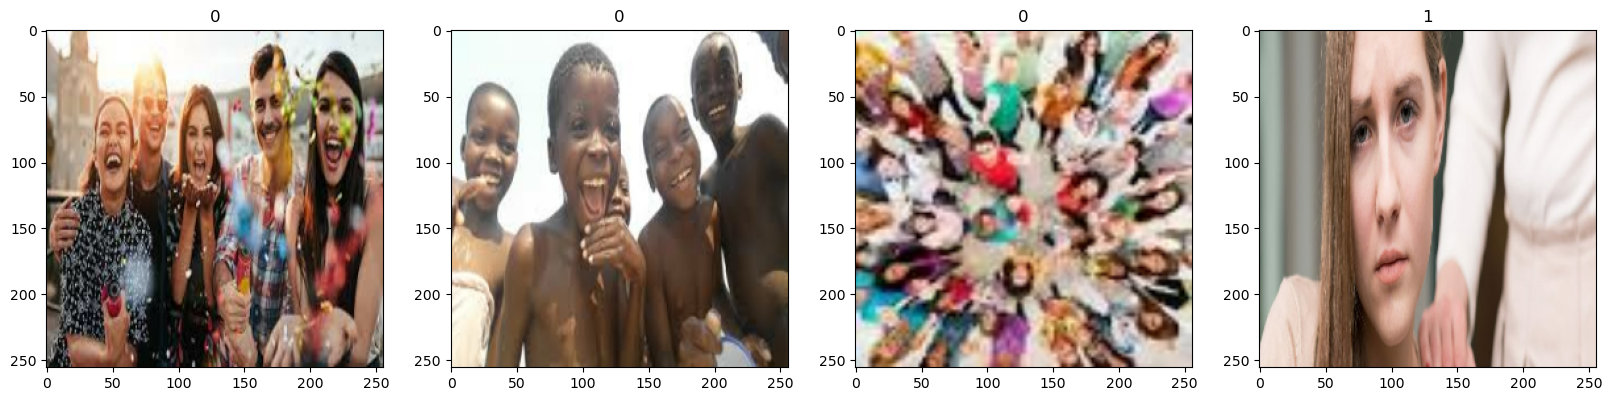

In [15]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
#1- sad
#0- happy

In [16]:
batch[0][0].max()

255.0

## Scale the pixel values between 0 and 1 instead of 0 and 255

	1.data before map(): At this stage, the dataset is just the raw data, and no transformations (like scaling) are applied yet.
	2.map() applied: When you call data.map(lambda x, y: (x/255, y)), it essentially means “add a transformation function to each batch of data, but don’t apply it yet.”
	3.Accessing batches: When you use .next() (or iterate over the dataset), the batch is fetched, and the scaling is applied dynamically to each batch during that access. This is the lazy evaluation part: the transformation happens only when you request data.

In [17]:
#as we load a batch, we are going to scale it
data = data.map(lambda x,y: (x/255, y))   #x: images, y:labels

In [18]:
data.as_numpy_iterator().next()[0].max()

1.0

## Split Data

In [19]:
len(data)

10

In [20]:
train_size= int(len(data)*0.7)
val_size= int(len(data)*0.1)
test_size= int(len(data)*0.2)

In [21]:
train= data.take(train_size)
test= data.skip(train_size).take(test_size)
val= data.skip(train_size+test_size).take(val_size)

## Deep Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3) ,1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3) ,1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/harleen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [27]:
logdir= 'logs'

In [28]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [29]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.4959 - loss: 0.9461 - val_accuracy: 0.5294 - val_loss: 0.6696
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.5317 - loss: 0.6590 - val_accuracy: 0.5294 - val_loss: 0.6370
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.6265 - loss: 0.6039 - val_accuracy: 0.7647 - val_loss: 0.5879
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.8219 - loss: 0.5471 - val_accuracy: 0.7647 - val_loss: 0.6167
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.8495 - loss: 0.4114 - val_accuracy: 0.9412 - val_loss: 0.3000
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.8473 - loss: 0.4064 - val_accuracy: 0.8235 - val_loss: 0.3485
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.8175 - loss: 0.4033 - val_accuracy: 0.8824 - val_loss: 0.4241
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.8855 - loss: 0.2786 - val_accuracy: 0.8824 - val_loss:

## Performance Plots

In [30]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

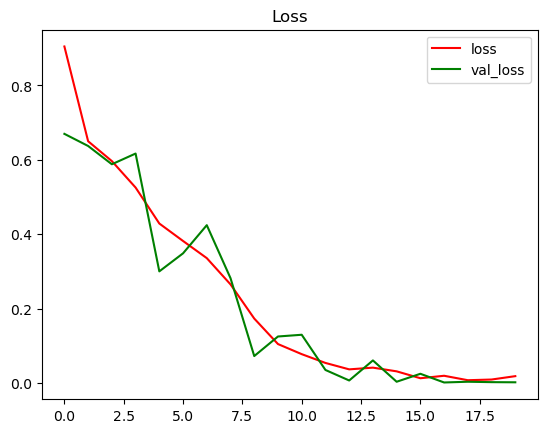

In [31]:
plt.plot(hist.history['loss'], label='loss', color='red')
plt.plot(hist.history['val_loss'], label='val_loss', color='green')
plt.legend(loc='upper right')
plt.title("Loss")
plt.show()

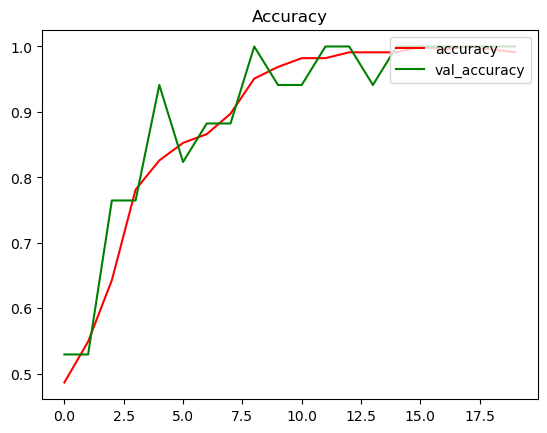

In [32]:
plt.plot(hist.history['accuracy'], label='accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='val_accuracy', color='green')
plt.legend(loc='upper right')
plt.title("Accuracy")
plt.show()

## Evaluating Model Performance

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
precision= Precision()
recall= Recall()
accuracy= BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred= model.predict(x)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


2024-12-25 01:23:49.093523: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
print(f"Precision: {precision.result().numpy()} Recall: {recall.result().numpy()} Accuracy: {accuracy.result().numpy()}")

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


## Testing on Images not the datasets

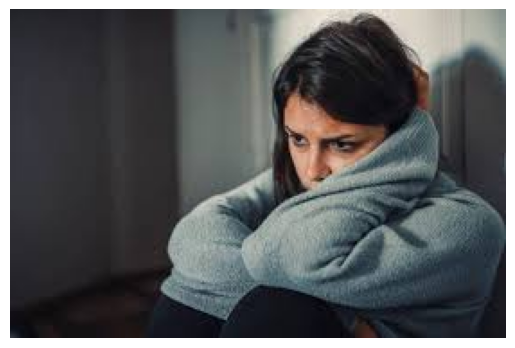

In [37]:
img = cv2.imread('test3.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

In [38]:
img_rgb= tf.image.resize(img_rgb,(256,256))
img_rgb = img_rgb / 255.0 

In [39]:
img_batch = np.expand_dims(img_rgb, axis=0)  # Add batch dimension

In [40]:
print(img_batch.shape)  

(1, 256, 256, 3)


In [41]:
y_pred = model.predict(img_batch) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [42]:
y_pred

array([[0.99900794]], dtype=float32)

In [43]:
if y_pred>=0.5:
    print("Predicted Sad")
else:
    print("Predicted Happy")

Predicted Sad


## Save the Model

In [44]:
model.save(os.path.join('Models', 'ImageClassifier.'))

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=Models/ImageClassifier..